## PART B
There are 9568 data points collected at a power plant from 2006 to 2011. There are 5 total variables collected: Ambient Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), Relative Humidity (RH), and Hourly Electrical Energy (PE). The data sets consists of 5 sheets, where's each sheet consist of the same values but are shuffled around. <br>
<br>
The power plant is generates power by gas turbine and steam turbine. The Exhaust vacuum (V) contribute to the steam turbine while the Ambient Temperature (AT), Ambient Pressure (AP), and Relative Humidity (RH) contribute to the gas turbine. <br>
<br>
UNITS:<br>
Ambient Temperature (AT): ºC<br>
Exhaust vacuum (V): milibar<br>
Ambient Pressure (AP): cmHg<br>
Relative Humidity (RH): Hg<br>
Electrical Energy (PE): MW<br>

In [1]:
import pandas as pd 

import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


df = pd.read_excel('Folds5x2_pp_xls_format.xls')

df.head()
# checks dataframe for null elements if we need cleanup
# df.info()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### PART C
For Power Plant dataset, obtain the plot PE vs AT and Simple Linear Regression
fit on the same figure (similar to Fig. 3.1 for the Advertising set)

In [2]:
# simple linear regression input & output setup
x_AT = np.column_stack((np.ones(9568), df['AT']))
y = df['PE'].values.reshape(9568, 1)

x_AT
y
print(f'x matrix size: {x_AT.shape}\n')
print(f'y matrix size: {y.shape}')

array([[ 1.  , 14.96],
       [ 1.  , 25.18],
       [ 1.  ,  5.11],
       ...,
       [ 1.  , 31.32],
       [ 1.  , 24.48],
       [ 1.  , 21.6 ]])

array([[463.26],
       [444.37],
       [488.56],
       ...,
       [429.57],
       [435.74],
       [453.28]])

x matrix size: (9568, 2)

y matrix size: (9568, 1)


In [3]:
# matrix multiplication to get optimal coefficients for AT (Simple Linear Regression)
coeff_AT = np.linalg.inv((x_AT.T).dot(x_AT)).dot(x_AT.T).dot(y)

coeff_AT

array([[497.03411989],
       [ -2.17131996]])

Text(0.5, 0, 'AT')

Text(0, 0.5, 'PE')

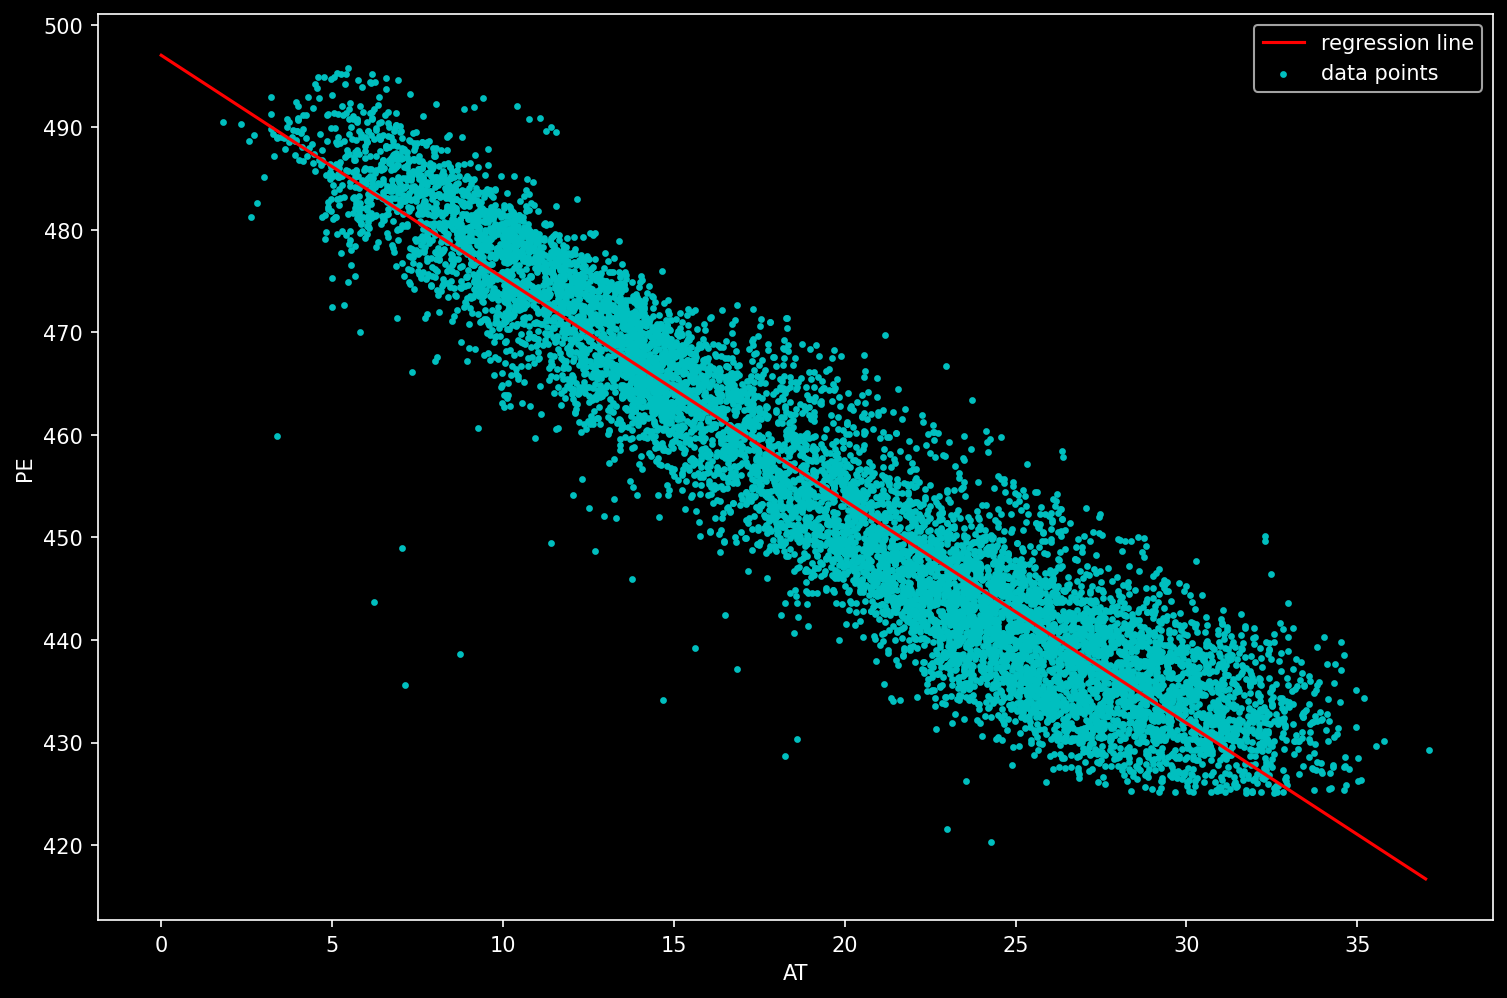

In [4]:
# plotting AT vs. PE with SLR line
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('dark_background')

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 150 

x_line_AT = np.arange(np.max(df['AT']))
y_line_AT = x_line_AT * coeff_AT[1,0] + coeff_AT[0,0] 
plt.plot(x_line_AT, y_line_AT, color ="r", label='regression line')
plt.scatter(df['AT'].values, df['PE'].values, label='data points', color ="c", s=5)
plt.xlabel('AT')
plt.ylabel('PE')
plt.legend(loc='upper right')

### PART D
Use OLS from statmodels.api library to obtain a table similar to Table 3.1

In [5]:
import statsmodels.formula.api as sm

results_AT = sm.ols('PE ~ AT', df).fit()
print(results_AT.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:43:48   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

### PART E
Answer the following questions using part-c and part-d results:  

<br>
Is there a relationship between the predictor and the response?  

• Since our p-value is less than 1 percent and R squared are close to 1, there is a relationship between predictor and the response.  
<br>
How strong is the relationship between the predictor and the response?  
• Theres a strong relationship between Ambient Temperature (AT) and Hourly Electrical Energy (PE).  
<br>
Is the relationship between the predictor and the response positive or negative?  
• our β1 is a negative value (and slope is negative) so its negative relationship between Ambient Temperature (AT) and Hourly Electrical Energy (PE).<br>

### PART F
Repeat part-c, part-d, and part-e for the rest of the input variables (AP, V, RH) to obtain a table similar to Table 3.3

In [6]:
# simple linear regression setup for AP, V, RH
x_AP = np.column_stack((np.ones(9568), df['AP']))
x_V = np.column_stack((np.ones(9568), df['V']))
x_RH = np.column_stack((np.ones(9568), df['RH']))

x_AP
x_V
x_RH
print(f'X_AP matrix size: {x_AT.shape}\n')
print(f'X_V matrix size: {x_V.shape}\n')
print(f'X_RH matrix size: {x_RH.shape}\n')

array([[1.00000e+00, 1.02407e+03],
       [1.00000e+00, 1.02004e+03],
       [1.00000e+00, 1.01216e+03],
       ...,
       [1.00000e+00, 1.01292e+03],
       [1.00000e+00, 1.01386e+03],
       [1.00000e+00, 1.01723e+03]])

array([[ 1.  , 41.76],
       [ 1.  , 62.96],
       [ 1.  , 39.4 ],
       ...,
       [ 1.  , 74.33],
       [ 1.  , 69.45],
       [ 1.  , 62.52]])

array([[ 1.  , 73.17],
       [ 1.  , 59.08],
       [ 1.  , 92.14],
       ...,
       [ 1.  , 36.48],
       [ 1.  , 62.39],
       [ 1.  , 67.87]])

X_AP matrix size: (9568, 2)

X_V matrix size: (9568, 2)

X_RH matrix size: (9568, 2)



In [7]:
# matrix multiplication to get optimal coefficients for AP, V, RH
coeff_AP = np.linalg.inv((x_AP.T).dot(x_AP)).dot(x_AP.T).dot(y)
coeff_V = np.linalg.inv((x_V.T).dot(x_V)).dot(x_V.T).dot(y)
coeff_RH = np.linalg.inv((x_RH.T).dot(x_RH)).dot(x_RH.T).dot(y)

print(f'Ambient Pressure (AP): β0 = {coeff_AP[0]}, β1 = {coeff_AP[1]}')
print(f'Exhaust Vacuum (V): β0 = {coeff_V[0]}, β1 = {coeff_V[1]}')
print(f'Relative Humidity (RH): β0 = {coeff_RH[0]}, β1 = {coeff_RH[1]}')


Ambient Pressure (AP): β0 = [-1055.26098898], β1 = [1.48987167]
Exhaust Vacuum (V): β0 = [517.80152631], β1 = [-1.16813513]
Relative Humidity (RH): β0 = [420.96176616], β1 = [0.4556501]


Text(0.5, 0, 'AP')

Text(0, 0.5, 'PE')

Ambient Pressure (AP): 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:43:48   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     2

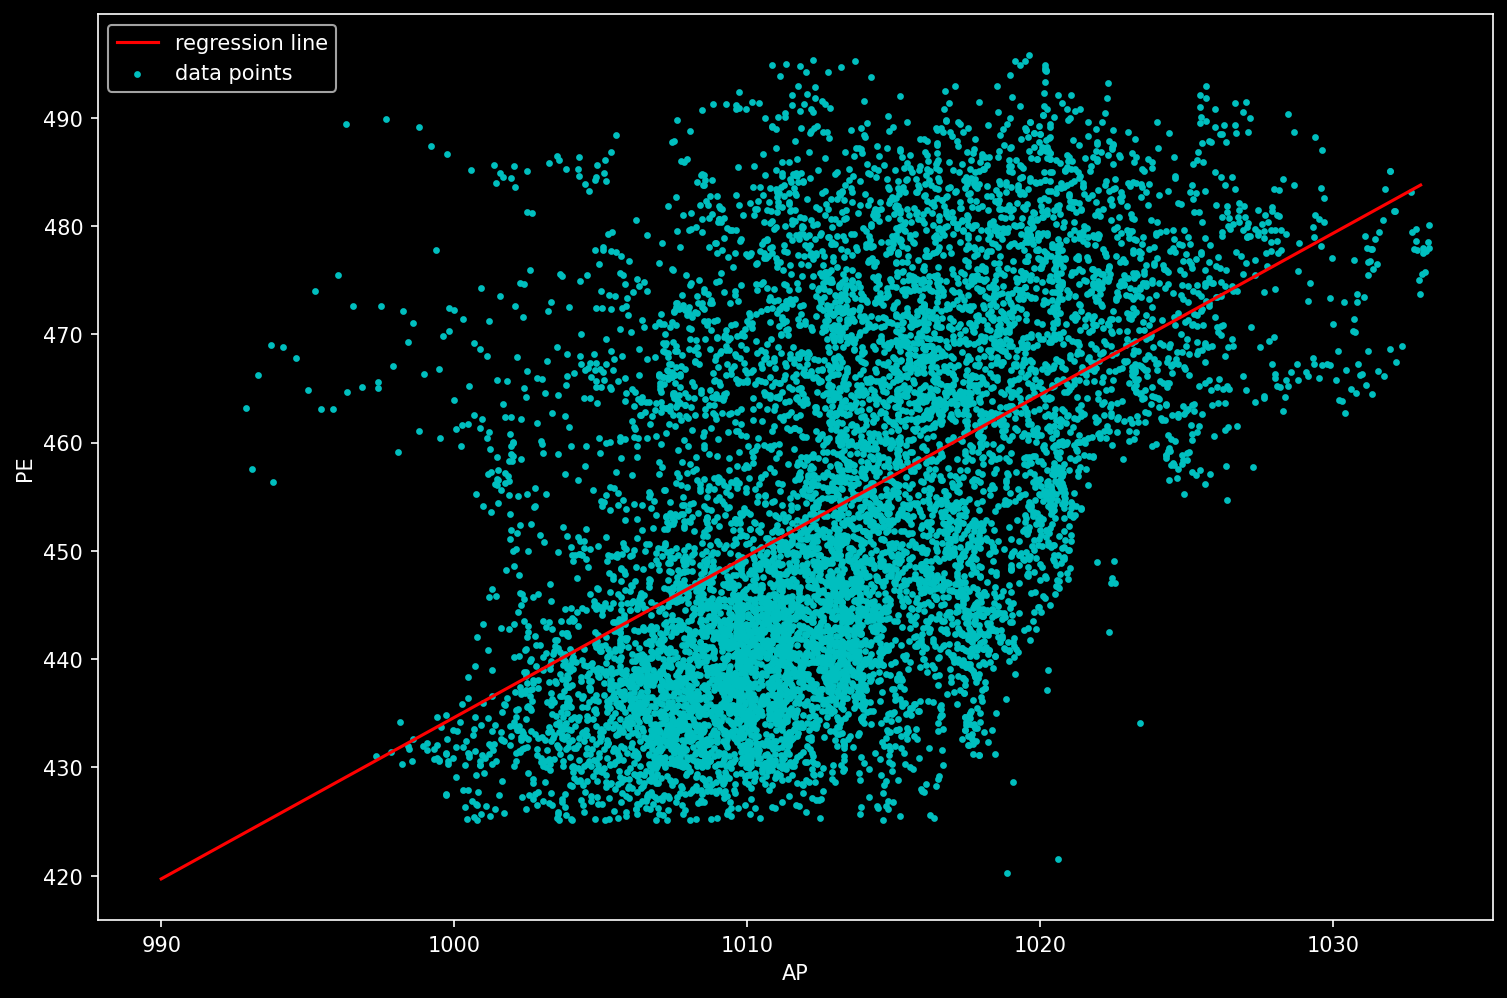

In [8]:
# plots for AP, V, and RH

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 150 

x_line_AP = np.arange(990, np.max(df['AP']))
y_line_AP = x_line_AP * coeff_AP[1,0] + coeff_AP[0,0] 
plt.plot(x_line_AP, y_line_AP, color ="r", label='regression line')
plt.scatter(df['AP'].values, df['PE'].values, label='data points', color ="c", s=5)
plt.xlabel('AP')
plt.ylabel('PE')
plt.legend(loc='upper left')

results_AP = sm.ols('PE ~ AP', df).fit()
print('Ambient Pressure (AP): \n')
print(results_AP.summary())

Text(0.5, 0, 'V')

Text(0, 0.5, 'PE')

Exhaust Vacuum (V): 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:43:48   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.3

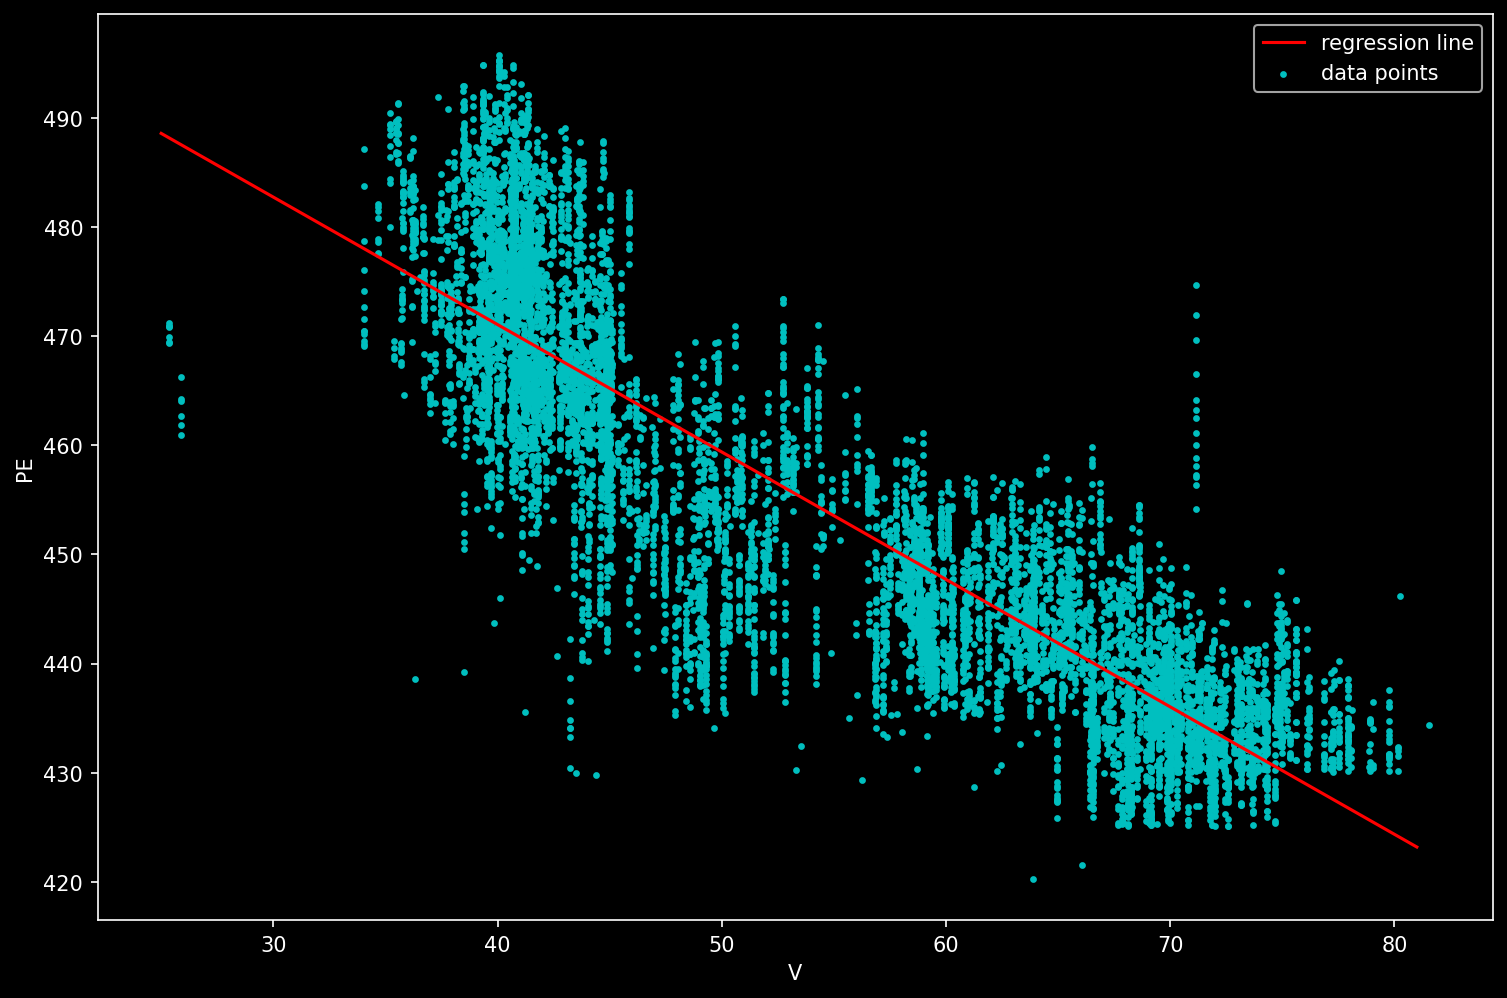

In [9]:
x_line_V = np.arange(25, np.max(df['V']))
y_line_V = x_line_V * coeff_V[1,0] + coeff_V[0,0] 
plt.plot(x_line_V, y_line_V, color ="r", label='regression line')
plt.scatter(df['V'].values, df['PE'].values, label='data points', color ="c", s=5)
plt.xlabel('V')
plt.ylabel('PE')
plt.legend(loc='upper right')

results_V = sm.ols('PE ~ V', df).fit()
print('Exhaust Vacuum (V): \n')
print(results_V.summary())

Text(0.5, 0, 'RH')

Text(0, 0.5, 'PE')

Relative Humidity (RH): 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:43:49   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618     

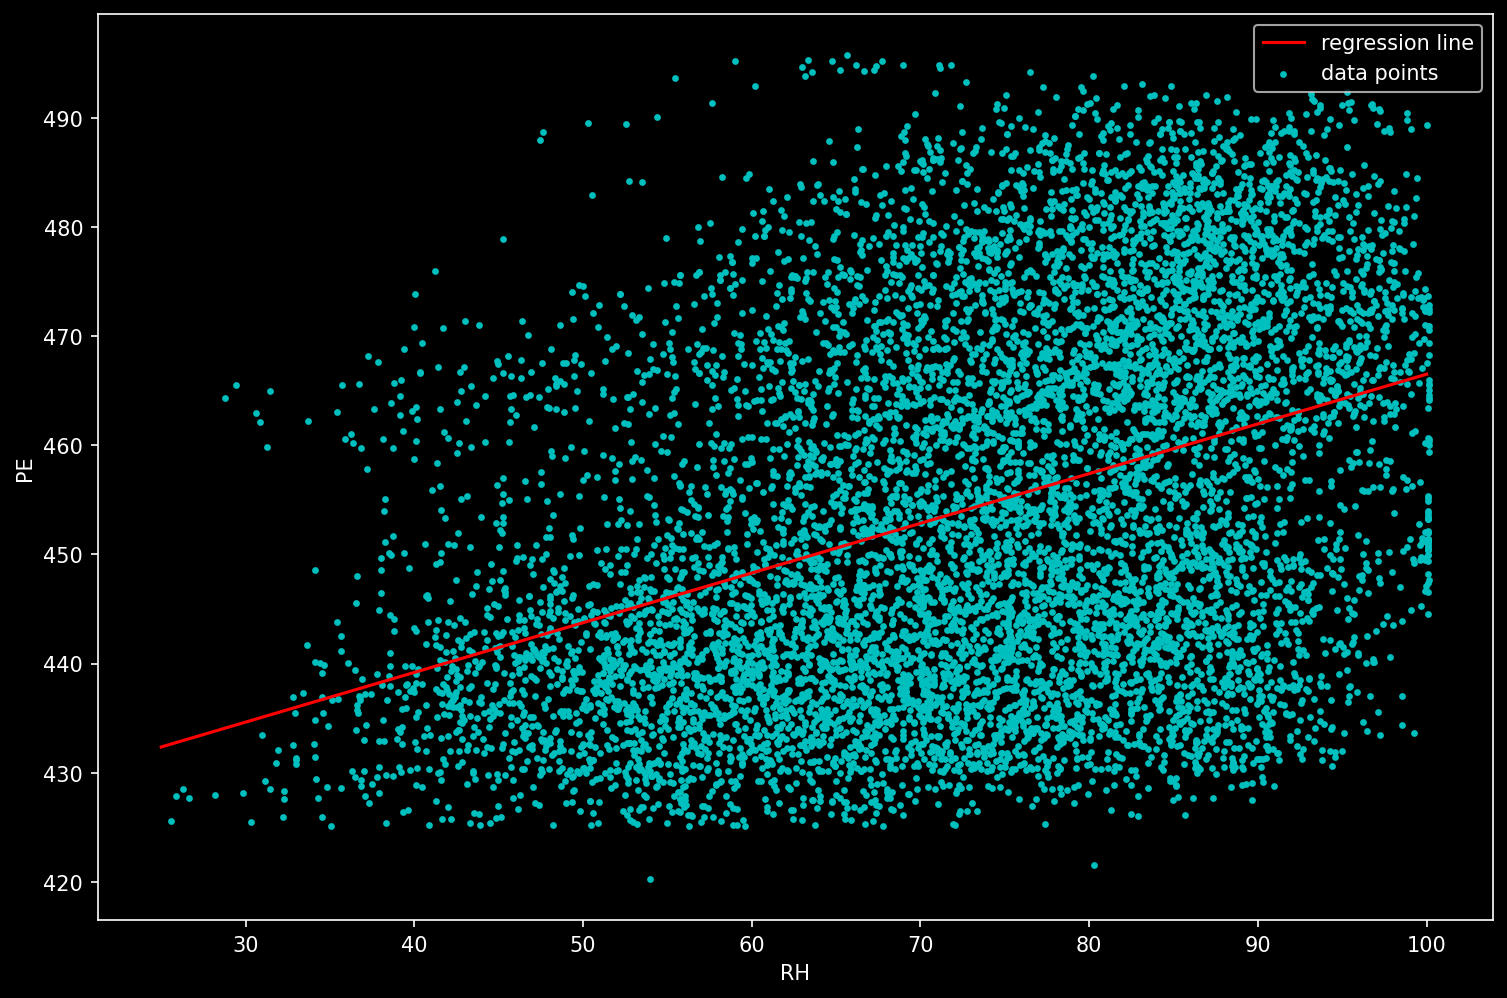

In [10]:
x_line = np.arange(25, np.max(df['RH']))
y_line = x_line * coeff_RH[1,0] + coeff_RH[0,0] 
plt.plot(x_line, y_line, color ="r", label='regression line')
plt.scatter(df['RH'].values, df['PE'].values, label='data points', color ="c", s=5)
plt.xlabel('RH')
plt.ylabel('PE')
plt.legend(loc='upper right')

results_RH = sm.ols('PE ~ RH', df).fit()
print('Relative Humidity (RH): \n')
print(results_RH.summary())

### PART G
Use all four input variables and OLS from statmodels.api library to obtain a table
similar to Table 3.4. Answer the following questions:  
<br>
Which predictors appear to have a statistically significant relationship to
the response?  
• Since AT have high β1 and relatively standard error, we can reject the null hypothesis for this predictor and thus have high relationship with the response. V will be the second input that have the second most relationship with the output.

<br>
What does the coefficient for the AT variable suggest?  
• AT coefficient suggests that there is a negative relationship between AT and PE.
<br>

In [11]:

results = sm.ols('PE ~ AT + V + AP + RH', df).fit()
print('Multi Linear Regression Summary: \n')
print(results.summary())

print(df.corr())

Multi Linear Regression Summary: 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:43:49   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.

### PART H
Use all four input variables and create new nonlinear features (using your choice
of nonlinearity), and develop regression models. Compare with the linear
models and comment on your observations.  
<br>
the R squared value are almost identical, but has improved by 0.003. The coefficient for 'cust_feat' is close to zero but the STE error is pretty small compare to the coefficent, no concern about the null hypothesis. the reason I pick the predictors AT, AP, and RH together is because I know they both contribute to  gas turbine.

In [12]:
# coefficients: β0 + β1·AT + β2·V + β3·(AT*AP*RH)

df_MLR = pd.DataFrame(df, columns=['AT', 'V'])
df_MLR['custom_feat'] = round(df['AT']*df['AP']*df['RH']/20000, ndigits=2)
df_MLR['PE'] = df['PE']

df_MLR

,AT,V,custom_feat,PE
0,14.96,41.76,56.05,463.26
1,25.18,62.96,75.87,444.37
2,5.11,39.40,23.83,488.56
3,20.86,57.32,80.75,446.48
4,10.82,37.50,52.75,473.90
...,...,...,...,...
9563,16.65,49.69,76.82,460.03
9564,13.19,39.18,45.08,469.62
9565,31.32,74.33,57.87,429.57
9566,24.48,69.45,77.42,435.74


In [13]:
results_MLR = sm.ols('PE ~ AT + V + custom_feat', df_MLR).fit()

results_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 4.339e+04
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:43:49   Log-Likelihood:                -27893.
No. Observations:                9568   AIC:                         5.579e+04
Df Residuals:                    9564   BIC:                         5.582e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     505.9205      0.217   2331.876      0.000     505.495     506.346
AT             -1.4491      0.013   -114.555      0.000      -1.474      -1.424
V              -0.2215      0.007    -31.424      0.000      -0.235      -0.208
custom_feat    -0.1580      0.003    -47.018      0.000      -0.165      -0.151
==============================================================================
Omnibus:                     1125.667   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5665.609
Skew:                          -0.464   Prob(JB):                         0.00
Kurtosis:                       6.654   Cond. No.                         449.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""